In [1]:
from dateutil.relativedelta import *
import calendar
from pandas import read_csv
from dateutil import parser
import numpy as np
from scipy.optimize import curve_fit
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from datetime import *
import os
from dateutil.relativedelta import relativedelta, MO
from tqdm import tqdm



In [2]:
plt.style.use('seaborn')
df = pd.read_csv("potato_variety_NDVI.csv")


In [3]:
ids = []
for col in df.columns:
    ids.append(col)

In [4]:
ids

['SowingDate',
 'Variety_x',
 '2019-10-07',
 '2019-10-12',
 '2019-10-20',
 '2019-10-25',
 '2019-11-01',
 '2019-11-11',
 '2019-11-14',
 '2019-11-19',
 '2019-11-26',
 '2019-12-09',
 '2019-12-16',
 '2019-12-19',
 '2019-12-26',
 '2020-01-01',
 '2020-01-13',
 '2020-01-20',
 '2020-01-25',
 '2020-01-28',
 '2020-02-04',
 '2020-02-15',
 '2020-02-19',
 '2020-02-29',
 '2020-03-05',
 '2020-03-16',
 '2020-03-20',
 '2020-03-26',
 '2020-03-31',
 '2020-04-07',
 '2020-04-17',
 '2020-04-22',
 'Har_date']

In [5]:
variety = list(set(df.iloc[:,1]))
df['SowingDate'] = pd.to_datetime(df['SowingDate'])


In [6]:
T=365.2425

In [7]:
def CCDC(t, c0, c1, a1, b1, a2, b2, a3, b3):
    return c0 + c1*t \
        + a1*np.cos(2*np.pi*1*t/T) + b1*np.sin(2*np.pi*1*t/T) \
        + a2*np.cos(2*np.pi*2*t/T) + b2*np.sin(2*np.pi*2*t/T) \
        + a3*np.cos(2*np.pi*3*t/T) + b3*np.sin(2*np.pi*3*t/T)

In [8]:
list_date = list(df.columns.values)

In [9]:
list_date                          #this represent index row values

['SowingDate',
 'Variety_x',
 '2019-10-07',
 '2019-10-12',
 '2019-10-20',
 '2019-10-25',
 '2019-11-01',
 '2019-11-11',
 '2019-11-14',
 '2019-11-19',
 '2019-11-26',
 '2019-12-09',
 '2019-12-16',
 '2019-12-19',
 '2019-12-26',
 '2020-01-01',
 '2020-01-13',
 '2020-01-20',
 '2020-01-25',
 '2020-01-28',
 '2020-02-04',
 '2020-02-15',
 '2020-02-19',
 '2020-02-29',
 '2020-03-05',
 '2020-03-16',
 '2020-03-20',
 '2020-03-26',
 '2020-03-31',
 '2020-04-07',
 '2020-04-17',
 '2020-04-22',
 'Har_date']

In [10]:
list_date.remove('SowingDate')
list_date.remove('Variety_x')
list_date.remove('Har_date')


In [34]:
list_date

['2019-10-07',
 '2019-10-12',
 '2019-10-20',
 '2019-10-25',
 '2019-11-01',
 '2019-11-11',
 '2019-11-14',
 '2019-11-19',
 '2019-11-26',
 '2019-12-09',
 '2019-12-16',
 '2019-12-19',
 '2019-12-26',
 '2020-01-01',
 '2020-01-13',
 '2020-01-20',
 '2020-01-25',
 '2020-01-28',
 '2020-02-04',
 '2020-02-15',
 '2020-02-19',
 '2020-02-29',
 '2020-03-05',
 '2020-03-16',
 '2020-03-20',
 '2020-03-26',
 '2020-03-31',
 '2020-04-07',
 '2020-04-17',
 '2020-04-22']

In [35]:
listDateArr = np.array(list_date)

In [36]:
listSowingDate = []                                     #this represent column values
listSowingDate = list(df['SowingDate'])

In [37]:
#SowingDate as reference date

In [38]:
#rd=[]
#for i in range(len(list_date)):
#    rd.append(parser.parse(list_date[i]) - ref_date)

In [39]:
##newDays = []
#for i in range(len(rd)):
#    newDays.append(rd[i].days)


In [40]:
#listdateArr = np.array(newDays)

In [41]:
coeff_dict = {
    'variety': [] , 
    'c0' : [],
    'c1' : [],
    'a1' : [],
    'b1' : [],
    'a2' : [],
    'b2' : [],
    'a3' : [],
    'b3' : [],
    
}


In [42]:
#listSowingDate = []
#listSowingDate = list(df['SowingDate'])

In [43]:
#rd_SowDays = []
#for i in range(len(listSowingDate)):
 #   rd_SowDays.append((listSowingDate[i]) - ref_date)

In [44]:
#SowDays = []
#for i in range(len(rd_SowDays)):
 #   SowDays.append(rd_SowDays[i].days)


In [110]:
n = 10
df2 = df.head(int(len(df)*(n/100)))

In [46]:
df2.to_csv( 'C:/Users/rocke/Downloads/0.01Shortdataset.csv')

In [47]:
new_df = pd.read_csv('0.01Shortdataset.csv')

In [48]:
#column_indices = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
#new_names = newDays
#old_names = df2.columns[column_indices]
#df2.rename(columns=dict(zip(old_names, new_names)), inplace=True)
    
    

In [49]:
#SowArr = np.array(SowDays)

In [50]:
#df2.SowingDate = df.SowingDate - ref_date

In [51]:
pd.options.display.max_rows = 22371

In [52]:
df['Har_date'] = pd.to_datetime(df['Har_date'])

In [53]:
#df2.Har_date = (df.Har_date) - ref_date

In [54]:
df2.head()

,SowingDate,Variety_x,2019-10-07,2019-10-12,2019-10-20,2019-10-25,2019-11-01,2019-11-11,2019-11-14,2019-11-19,...,2020-02-29,2020-03-05,2020-03-16,2020-03-20,2020-03-26,2020-03-31,2020-04-07,2020-04-17,2020-04-22,Har_date
0,2019-11-19,M-39,0.3888,0.4437,0.2536,0.2590,0.2576,0.2048,0.1951,0.1555,...,0.6358,0.5008,0.3316,0.3171,0.1931,0.1713,0.1667,0.0286,0.1709,2020-03-16
1,2019-11-19,M-39,0.4383,0.5073,0.2368,0.2404,0.2122,0.1766,0.1829,0.1563,...,0.5991,0.4402,0.3153,0.2164,0.1798,0.1664,0.1672,0.0139,0.1723,2020-03-16
2,2019-11-19,M-39,0.3626,0.3917,0.2305,0.2473,0.2243,0.1764,0.1739,0.1574,...,0.6883,0.4953,0.3109,0.2360,0.1883,0.1654,0.1644,0.0210,0.1651,2020-03-16
3,2019-11-19,M-39,0.3608,0.3101,0.2226,0.2407,0.2109,0.1781,0.1566,0.1557,...,0.7047,0.5241,0.3120,0.2729,0.1803,0.1695,0.1692,0.0252,0.1603,2020-03-16
4,2019-11-19,M-39,0.3656,0.2750,0.2258,0.2522,0.2366,0.1722,0.1753,0.1487,...,0.7164,0.5291,0.3165,0.3133,0.1903,0.1662,0.1645,0.0268,0.1657,2020-03-16


In [55]:
df

,SowingDate,Variety_x,2019-10-07,2019-10-12,2019-10-20,2019-10-25,2019-11-01,2019-11-11,2019-11-14,2019-11-19,...,2020-02-29,2020-03-05,2020-03-16,2020-03-20,2020-03-26,2020-03-31,2020-04-07,2020-04-17,2020-04-22,Har_date
0,2019-11-19,M-39,0.3888,0.4437,0.2536,0.2590,0.2576,0.2048,0.1951,0.1555,...,0.6358,0.5008,0.3316,0.3171,0.1931,0.1713,0.1667,0.0286,0.1709,2020-03-16
1,2019-11-19,M-39,0.4383,0.5073,0.2368,0.2404,0.2122,0.1766,0.1829,0.1563,...,0.5991,0.4402,0.3153,0.2164,0.1798,0.1664,0.1672,0.0139,0.1723,2020-03-16
2,2019-11-19,M-39,0.3626,0.3917,0.2305,0.2473,0.2243,0.1764,0.1739,0.1574,...,0.6883,0.4953,0.3109,0.2360,0.1883,0.1654,0.1644,0.0210,0.1651,2020-03-16
3,2019-11-19,M-39,0.3608,0.3101,0.2226,0.2407,0.2109,0.1781,0.1566,0.1557,...,0.7047,0.5241,0.3120,0.2729,0.1803,0.1695,0.1692,0.0252,0.1603,2020-03-16
4,2019-11-19,M-39,0.3656,0.2750,0.2258,0.2522,0.2366,0.1722,0.1753,0.1487,...,0.7164,0.5291,0.3165,0.3133,0.1903,0.1662,0.1645,0.0268,0.1657,2020-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223714,2019-10-31,K.frysona,0.6195,0.3391,0.1800,0.1590,0.0901,0.1234,0.1103,0.0934,...,0.1475,0.1509,0.1689,0.2022,0.2899,0.3917,0.4498,0.5460,0.5984,2020-02-20
223715,2019-10-31,K.frysona,0.6778,0.3568,0.1652,0.1419,0.0750,0.1153,0.0929,0.0895,...,0.1338,0.1430,0.1668,0.1995,0.2902,0.3523,0.4514,0.5522,0.5940,2020-02-20
223716,2019-10-31,K.frysona,0.6844,0.3514,0.1602,0.1372,0.0716,0.1128,0.0890,0.0923,...,0.1347,0.1420,0.1678,0.2013,0.2928,0.3514,0.4496,0.5513,0.5946,2020-02-20
223717,2019-10-31,K.frysona,0.3794,0.3231,0.1702,0.1555,0.0947,0.1315,0.1328,0.0766,...,0.1513,0.1628,0.1829,0.2290,0.4019,0.5970,0.5951,0.6249,0.6184,2020-02-20


In [136]:
coeff_dict_new = {
    'rows': [],
    'variety': [] , 
    'c0' : [],
    'c1' : [],
    'a1' : [],
    'b1' : [],
    'a2' : [],
    'b2' : [],
    'a3' : [],
    'b3' : [],
}
n = 10
df2 = df.head(int(len(df)*(n/100)))
from tqdm import tqdm


for pivot1, row in tqdm(df2.iterrows(),total = len(df2)):
    ref_date = (df2["SowingDate"][pivot1])
    rd=[]
    ro = []
    for pivot2 in range(2,len(df2.columns)-1):
        if (parser.parse(list_date[pivot2-2]) - ref_date).total_seconds()>0:
            rd.append(str((parser.parse(list_date[pivot2-2]) - ref_date).total_seconds()))
            ro.append(row[pivot2])
        #df2.SowingDate[pivot1] = df.SowingDate[pivot1] - ref_date
        #df2.Har_date[pivot1] = (df.Har_date[pivot1]) - ref_date
        
        
        #if (df2['Har_date'][pivot1].total_seconds() >= (parser.parse(df2.columns.values[pivot2])- ref_date).total_seconds()) and (parser.parse(df2.columns.values[pivot2])- ref_date).total_seconds()>0:
    popt, _pcov = curve_fit(CCDC, rd, ro)
    variety = df2["Variety_x"][pivot1]


    c0,c1,a1, b1, a2, b2, a3, b3 = popt
    coeff_dict_new['variety'].append(variety)
    coeff_dict_new['rows'].append(ro)
    coeff_dict_new['c0'].append(c0)
    coeff_dict_new['c1'].append(c1)
    coeff_dict_new['a1'].append(a1)
    coeff_dict_new['b1'].append(b1)
    coeff_dict_new['a2'].append(a2)
    coeff_dict_new['b2'].append(b2)
    coeff_dict_new['a3'].append(a3)
    coeff_dict_new['b3'].append(b3)  


100%|███████████████████████████████████████████████████████████████████████████| 22371/22371 [02:15<00:00, 164.60it/s]


In [ ]:
column_indices = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
new_names = rd
old_names = df2.columns[column_indices]
df2.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
(df2["SowingDate"][2]).days

In [ ]:
len(df2.columns)

In [ ]:
coeff_dict_new

In [133]:
coeff_df_new = pd.DataFrame(data = coeff_dict_new)
coeff_df_new.to_csv('sow_date_ref.csv')

In [134]:
df_coeff_new = pd.read_csv("sow_date_ref.csv")

In [59]:
type((df2.columns.values[pivot2]))

str

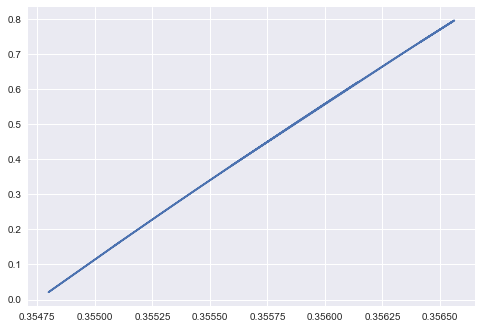

In [142]:
import matplotlib.pyplot as plt
t=coeff_dict_new['rows'][2]
c0=coeff_dict_new['c0'][2]
c1=coeff_dict_new['c1'][2]
a1=coeff_dict_new['a1'][2]
b1=coeff_dict_new['b1'][2]
a2=coeff_dict_new['a2'][2]
b2=coeff_dict_new['b2'][2]
a3=coeff_dict_new['a3'][2]
b3=coeff_dict_new['b3'][2]  
x = [CCDC(i, c0, c1, a1, b1, a2, b2, a3, b3) for i in t]
plt.plot(x,t)

In [140]:
c0, c1, a1, b1, a2, b2, a3, b3

(0.5350413798327129,
 -1.7033204532664256e-08,
 -0.05129307555221188,
 -0.011174630812063924,
 -0.04187525535583656,
 -0.01393571992902605,
 -0.10354288463329397,
 0.05797367898141846)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))